# 1- Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# 2- Load the Train and Test Dataset

In [2]:
raw_train_set = pd.read_csv("..\\data\\02_Intermediate\\Train.csv")
raw_train_set

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57
...,...,...,...,...,...,...,...,...
795,female,group D,master's degree,standard,none,87,100,100
796,male,group C,bachelor's degree,standard,none,69,63,61
797,female,group C,associate's degree,standard,none,53,62,53
798,male,group C,some college,free/reduced,completed,50,48,53


In [3]:
raw_test_set = pd.read_csv("..\\data\\02_Intermediate\\Test.csv")
raw_test_set

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,91,86,84
1,female,group B,some college,free/reduced,completed,53,66,73
2,male,group D,bachelor's degree,standard,none,80,73,72
3,male,group C,some college,free/reduced,none,74,77,73
4,male,group E,some college,standard,completed,84,83,78
...,...,...,...,...,...,...,...,...
195,female,group D,high school,free/reduced,completed,52,57,56
196,male,group E,associate's degree,standard,completed,62,56,53
197,female,group B,some college,free/reduced,none,74,81,76
198,female,group C,associate's degree,standard,none,65,77,74


## Making a Copy of Dataset
so the raw data will always be accessable.

In [4]:
train_set = raw_train_set.copy()
test_set = raw_test_set.copy()

# 3- Feature Engineering
Creating new features from existing ones, and removing those features we don't need

In [5]:
# this is an example. we don't need to add or remove any features in this case

# dataset['average score'] = ((dataset['math score'] + dataset['reading score'] + dataset['writing score'])/3).round(2)
# dataset.drop(['math score', 'reading score', 'writing score'], axis=1, inplace=True)
# dataset

# Splitting Dataset to Train and Test

In [6]:
X_train = train_set.drop('math score', axis=1)
y_train = train_set['math score']
X_test = test_set.drop('math score', axis=1)
y_test = test_set['math score']

## Splitting Features
The features are separated into numerical and categorical lists based on their data types. This helps in applying specific preprocessing steps to each group.

In [7]:
numerical_features = X_train.select_dtypes(exclude='O').columns
categorical_features = X_train.select_dtypes(include='O').columns

print('Numerical Features:')
for feature in numerical_features:
    print(f'\t{feature}')
print()
print('Categorical Features:')
for feature in categorical_features:
    print(f'\t{feature}')

Numerical Features:
	reading score
	writing score

Categorical Features:
	gender
	race/ethnicity
	parental level of education
	lunch
	test preparation course


# 4- Custom Cleaning
here we look for some less common problems which need to be cleaned like typos, columns of dates, etc.

In [8]:
for feature in categorical_features:
    print(f"unique values of {feature}:")
    for val in X_train[feature].unique():
        print(f"\t{val}")
    print()

unique values of gender:
	female
	male

unique values of race/ethnicity:
	group D
	group C
	group E
	group B
	group A

unique values of parental level of education:
	master's degree
	bachelor's degree
	some college
	high school
	associate's degree
	some high school

unique values of lunch:
	standard
	free/reduced

unique values of test preparation course:
	none
	completed



there are no typos in the dataset. so no custom cleaning is needed.

In [9]:
for col in X_train.columns:
    print(col)

gender
race/ethnicity
parental level of education
lunch
test preparation course
reading score
writing score


there are no date columns. so no custom cleaning is needed.

<mark style=" background-color:green;"> **there isn't any special problem needing custom cleaning in this dataset.** </mark>

# 5- Handling Missing Values

## Deciding how to Impute Missing Values

### Checking Skewness

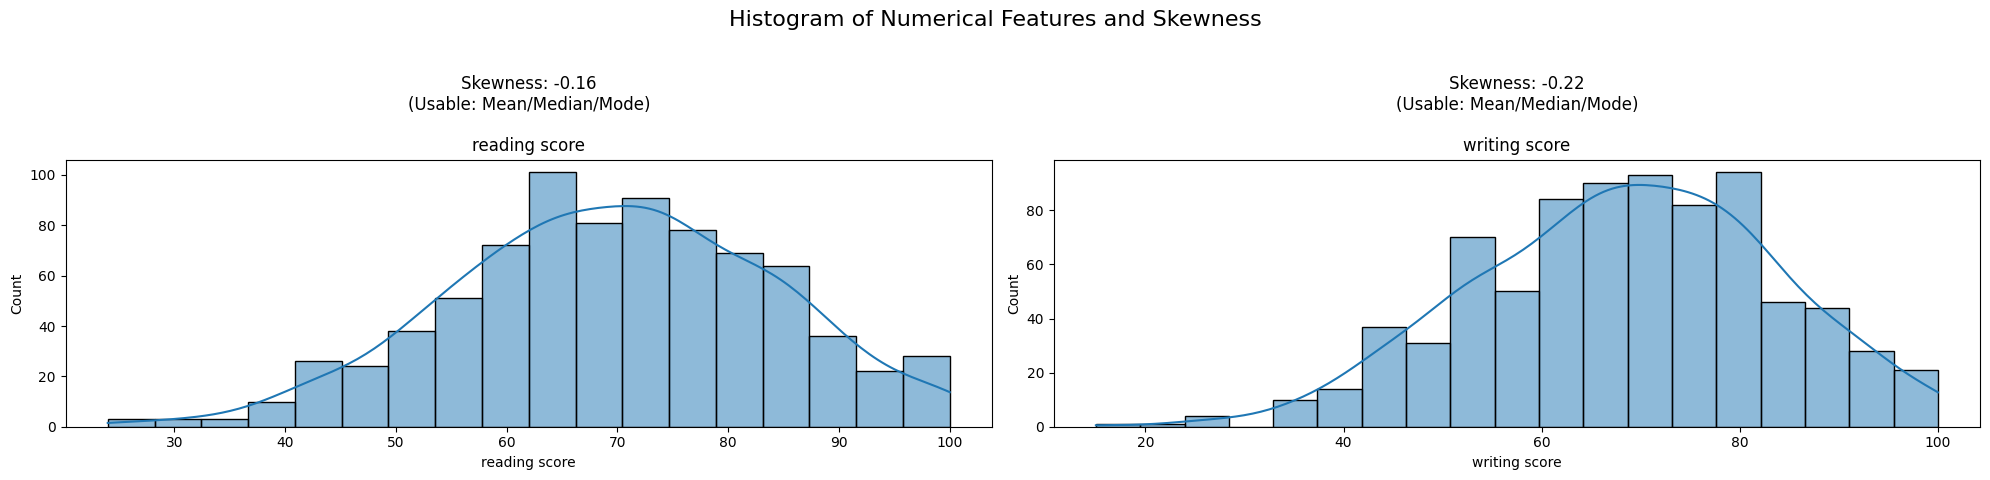

In [10]:
# Create a single figure to hold all the subplots
plt.figure(figsize=(20, 5)) 
plt.suptitle('Histogram of Numerical Features and Skewness', fontsize=16)

# Loop through the first three numerical features
# enumerate gives us both the index (i) and the feature name
for i, feature in enumerate(numerical_features):
    
    # Select the subplot position (1, 2, or 3)
    plt.subplot(1, 2, i + 1)
    
    # Plot the boxplot for the current feature
    sns.histplot(x=X_train[feature], kde=True)
    
    # Calculate kurtosis for the current feature
    skewness = X_train[feature].skew()
    
    # Set the title based on the kurtosis
    if np.abs(skewness) >= 0.5:
        plt.title(f'Skewness: {skewness:.2f}\n(Unuseable: Mean)\n(Useable: Median/Mode)\n\n{feature}')
    else:
        plt.title(f'Skewness: {skewness:.2f}\n(Usable: Mean/Median/Mode)\n\n{feature}')

# Adjust the layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect adjusts for suptitle
plt.show()

both numerical features are almost symetric (skewness between -0.5 and 0.5)<mark style=" background-color:green;"> **so we don't have problem using mean** </mark>.<br>
if histograms were skewed, we couldn't use mean (only median and mode were useable)

### Checking Modality (Multiple Peaks)
According to histogram charts, no clear multiple peaks are observable (we pay attention to kde line, not the bars)<mark style=" background-color:green;"> **so we don't have problem using mean and median** </mark>.<br>
if there were multiple peaks we only could use Mode.

### Checking Kurtosis (counts as Extreme Outliers)

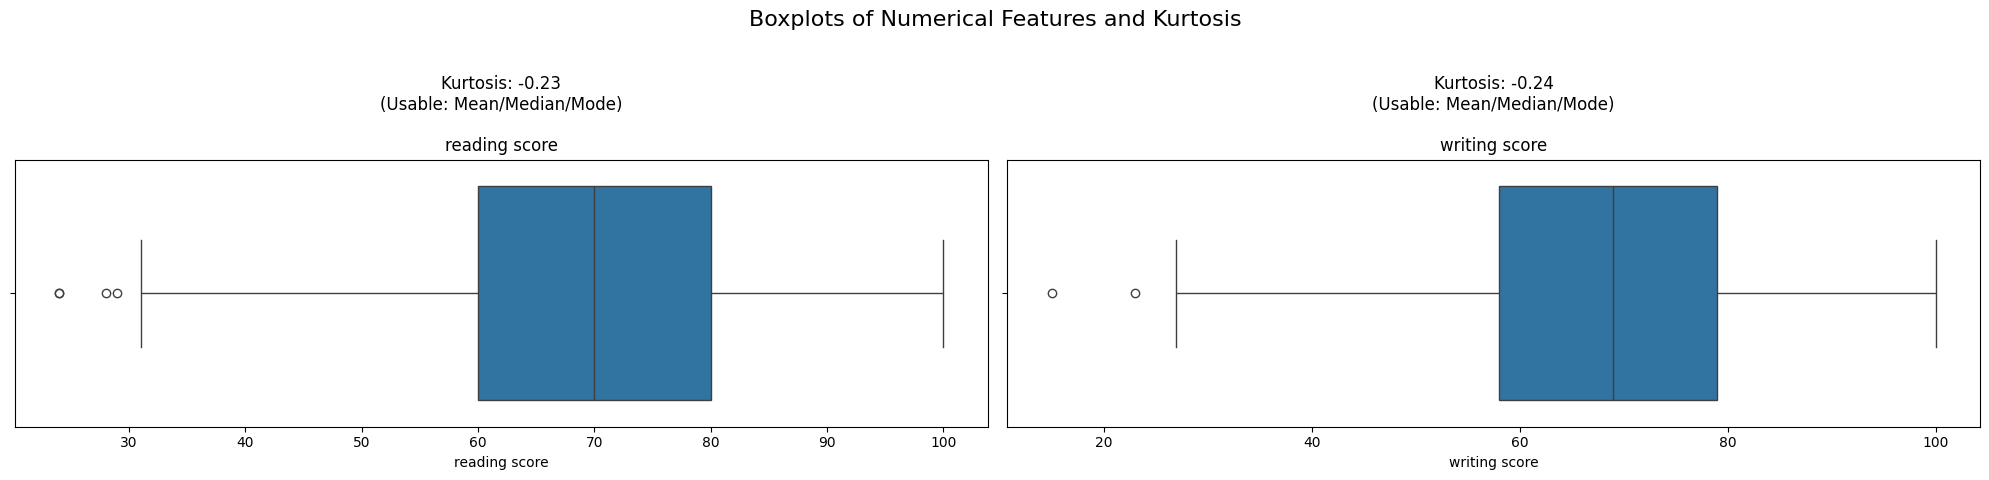

In [11]:
# Create a single figure to hold all the subplots
plt.figure(figsize=(20, 5)) 
plt.suptitle('Boxplots of Numerical Features and Kurtosis', fontsize=16)

# Loop through the first three numerical features
# enumerate gives us both the index (i) and the feature name
for i, feature in enumerate(numerical_features):
    
    # Select the subplot position (1, 2, or 3)
    plt.subplot(1, 2, i + 1)
    
    # Plot the boxplot for the current feature
    sns.boxplot(x=X_train[feature], orient='h')
    
    # Calculate kurtosis for the current feature
    kurt = X_train[feature].kurt()
    
    # Set the title based on the kurtosis
    if kurt >= 1:
        plt.title(f'Kurtosis: {kurt:.2f}\n(Unuseable: Mean)\n(Useable: Median/Mode)\n\n{feature}')
    else:
        plt.title(f'Kurtosis: {kurt:.2f}\n(Usable: Mean/Median/Mode)\n\n{feature}')

# Adjust the layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect adjusts for suptitle
plt.show()

both numerical features don't have extreme outliers (kurtosis lower than 1)<mark style=" background-color:green;"> **so we don't have problem using mean** </mark>.<br>
if kurtosis of numerical features were equal or greater than 1, or simply if there were extreme outliers, we couldn't use mean (only median and mode were useable)

### Numerical Type
both numerical features are continuos (not discrete)<mark style=" background-color:green;"> **so we don't have problem using mean** </mark>.<br>
if features were discrete we only could use Mode.

### Final Decision
both numerical features can use mean to impute missing values and as we prefer to use mean rather than median and mode, final decision is to use<mark style=" background-color:green;"> **Mean** </mark>.

## Impute Missing Values

In [12]:
print(f'Number of missing values in the raw X_train: {X_train.isnull().sum().sum()}')

mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')
# Fit and transform only the numerical columns,
# then assign the result back to those same columns in the copied DataFrame.
X_train[numerical_features] = mean_imputer.fit_transform(X_train[numerical_features])
X_train[categorical_features] = mode_imputer.fit_transform(X_train[categorical_features])
print(f'Number of missing values after handling duplicates in the X_train: {X_train.isnull().sum().sum()}')

Number of missing values in the raw X_train: 0
Number of missing values after handling duplicates in the X_train: 0


as you see, we already didn't have missing values so no actual changes will be observed.

# 6- Handling Outliers
Managing extreme values in your numerical features (both original and newly created).

In [13]:
def show_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Inspects specified columns for outliers using the IQR method and returns a report.
    """
    outlier_report = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outlier_report[column] = outliers[column]
    return pd.DataFrame(outlier_report).fillna('Not Outlier')

outliers = show_outliers(X_train, numerical_features)
print(f'these indexes of X_train includes outliers: {outliers.index}')
outliers

these indexes of X_train includes outliers: Index([5, 24, 84, 745], dtype='int64')


,reading score,writing score
5,24.0,15.0
24,29.0,Not Outlier
84,28.0,Not Outlier
745,24.0,23.0


**as we can observe here,<mark style=" background-color:yellow;"> the IQR method shows us that 4 rows are including outliers but, </mark>the most important thing is that <mark style=" background-color:yellow;">our numerical features are Bounded. </mark>**
## Handling Outliers in Bounded Features

For numerical features that have a defined logical or physical range, the approach to outlier detection is guided by <mark style=" background-color:yellow;"> domain knowledge </mark>.

<mark style=" background-color:yellow;"> Domain knowledge takes priority over the IQR method. </mark>

<mark style=" background-color:yellow;">Values outside the valid range</mark> are considered data entry or measurement errors, not natural outliers. These are the<mark style=" background-color:yellow;"> primary candidates for correction or removal.</mark> 

<mark style=" background-color:green;">Extreme values that fall inside the valid range (e.g., the minimum or maximum possible values) are treated as legitimate data points. These are kept to preserve the true distribution of the data.</mark>

In [14]:
def remove_invalid_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    removes the invalid outliers (every value out of [0, 100] range)
    """
    outliers_indexes = set()
    for column in columns:
        outliers = df[(df[column] < 0) | (df[column] > 100)]
        outliers_indexes.update(outliers.index)

    df_out = df.drop(index=list(outliers_indexes))

    return df_out

In [15]:
X_train = remove_invalid_outliers(X_train, numerical_features)
X_train

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group D,master's degree,standard,none,70.0,75.0
1,female,group C,bachelor's degree,free/reduced,completed,83.0,83.0
2,female,group D,some college,free/reduced,none,89.0,86.0
3,male,group C,master's degree,free/reduced,none,67.0,66.0
4,male,group E,high school,standard,none,64.0,57.0
...,...,...,...,...,...,...,...
795,female,group D,master's degree,standard,none,100.0,100.0
796,male,group C,bachelor's degree,standard,none,63.0,61.0
797,female,group C,associate's degree,standard,none,62.0,53.0
798,male,group C,some college,free/reduced,completed,48.0,53.0


In [16]:
X_test = remove_invalid_outliers(X_test, numerical_features)
X_test

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group C,associate's degree,standard,none,86,84
1,female,group B,some college,free/reduced,completed,66,73
2,male,group D,bachelor's degree,standard,none,73,72
3,male,group C,some college,free/reduced,none,77,73
4,male,group E,some college,standard,completed,83,78
...,...,...,...,...,...,...,...
195,female,group D,high school,free/reduced,completed,57,56
196,male,group E,associate's degree,standard,completed,56,53
197,female,group B,some college,free/reduced,none,81,76
198,female,group C,associate's degree,standard,none,77,74


as there are no invalid outliers (no value less than 0 or greater than 100), no row is removed

**In this specific case, any value outside the [0, 100] range indicates a data entry error, which must be removed.**

However, in other cases where domain knowledge isn't available, the IQR method is the primary tool for outlier detection. If this method reveals many outliers, it suggests a **skewed distribution**. In that situation, it's better to apply a **log transformation** to the feature instead of removing the outliers. This way, you **reduce their influence without losing valuable information**.

# 7- Encoding and Scaling (Data Transformation)

## Define Data Transformer

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
std_scaler = StandardScaler()
one_hot_enc = OneHotEncoder(drop='if_binary',sparse_output=False) # uses 1 row for binary encodings like gender yes/no features.
data_transformer = ColumnTransformer(
    transformers=[
        ('standard scaler', std_scaler, numerical_features),
        ('one hot encoder', one_hot_enc, categorical_features)
    ]
)

## Transform X_train and X_test

In [18]:
X_train_preprocessed = pd.DataFrame(data_transformer.fit_transform(X_train), columns=data_transformer.get_feature_names_out())
X_test_preprocessed = pd.DataFrame(data_transformer.transform(X_test), columns=data_transformer.get_feature_names_out())

In [19]:
print(X_train_preprocessed.info())
X_train_preprocessed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   standard scaler__reading score                                   800 non-null    float64
 1   standard scaler__writing score                                   800 non-null    float64
 2   one hot encoder__gender_male                                     800 non-null    float64
 3   one hot encoder__race/ethnicity_group A                          800 non-null    float64
 4   one hot encoder__race/ethnicity_group B                          800 non-null    float64
 5   one hot encoder__race/ethnicity_group C                          800 non-null    float64
 6   one hot encoder__race/ethnicity_group D                          800 non-null    float64
 7   one hot encoder__race/ethnicity_group E     

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none
0,0.030791,0.434053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.930290,0.964701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.345443,1.163694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.176786,-0.162925,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.384363,-0.759904,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.106557,2.092328,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
796,-0.453555,-0.494580,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
797,-0.522747,-1.025228,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
798,-1.491438,-1.025228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
print(X_test_preprocessed.info())
X_test_preprocessed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   standard scaler__reading score                                   200 non-null    float64
 1   standard scaler__writing score                                   200 non-null    float64
 2   one hot encoder__gender_male                                     200 non-null    float64
 3   one hot encoder__race/ethnicity_group A                          200 non-null    float64
 4   one hot encoder__race/ethnicity_group B                          200 non-null    float64
 5   one hot encoder__race/ethnicity_group C                          200 non-null    float64
 6   one hot encoder__race/ethnicity_group D                          200 non-null    float64
 7   one hot encoder__race/ethnicity_group E     

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none
0,1.137866,1.031032,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.245978,0.301391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.238367,0.235060,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.515136,0.301391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.930290,0.633046,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.868708,-0.826235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196,-0.937901,-1.025228,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197,0.791905,0.500384,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
198,0.515136,0.367722,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


## Concating Preprocessed X features with their own y features
and to save preprocessed_train_set and preprocessed_test_set in data\\03_Processed

In [21]:
preprocessed_train_set = pd.concat((X_train_preprocessed, y_train), axis=1)
preprocessed_train_set

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none,math score
0,0.030791,0.434053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,62
1,0.930290,0.964701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,1.345443,1.163694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,79
3,-0.176786,-0.162925,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,61
4,-0.384363,-0.759904,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.106557,2.092328,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,87
796,-0.453555,-0.494580,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,69
797,-0.522747,-1.025228,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,53
798,-1.491438,-1.025228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50


In [22]:
preprocessed_test_set = pd.concat((X_test_preprocessed, y_test), axis=1)
preprocessed_test_set

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none,math score
0,1.137866,1.031032,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,91
1,-0.245978,0.301391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,53
2,0.238367,0.235060,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,80
3,0.515136,0.301391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,74
4,0.930290,0.633046,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.868708,-0.826235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52
196,-0.937901,-1.025228,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,62
197,0.791905,0.500384,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,74
198,0.515136,0.367722,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,65


In [23]:
preprocessed_train_set.to_csv("..\\data\\03_Processed\\preprocessed_train_set.csv", index=False)
preprocessed_test_set.to_csv("..\\data\\03_Processed\\preprocessed_test_set.csv", index=False)

In [24]:
pd.read_csv("..\\data\\03_Processed\\preprocessed_train_set.csv")

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none,math score
0,0.030791,0.434053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,62
1,0.930290,0.964701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66
2,1.345443,1.163694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,79
3,-0.176786,-0.162925,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,61
4,-0.384363,-0.759904,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.106557,2.092328,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,87
796,-0.453555,-0.494580,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,69
797,-0.522747,-1.025228,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,53
798,-1.491438,-1.025228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50


In [25]:
pd.read_csv("..\\data\\03_Processed\\preprocessed_test_set.csv")

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none,math score
0,1.137866,1.031032,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,91
1,-0.245978,0.301391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,53
2,0.238367,0.235060,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,80
3,0.515136,0.301391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,74
4,0.930290,0.633046,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.868708,-0.826235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,52
196,-0.937901,-1.025228,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,62
197,0.791905,0.500384,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,74
198,0.515136,0.367722,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,65
